In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [109]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [110]:
data.rename(columns = {'yrs.since.phd':'yrs_since_phd', 'yrs.service':'yrs_service'}, inplace = True)

data.head()

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [111]:
data.shape

(397, 6)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs_since_phd  397 non-null    int64 
 3   yrs_service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [113]:
data.isnull().sum()

rank             0
discipline       0
yrs_since_phd    0
yrs_service      0
sex              0
salary           0
dtype: int64

In [114]:
data.describe()

,yrs_since_phd,yrs_service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [115]:
print(data['rank'].unique())
print(data['sex'].unique())
print(data['discipline'].unique())

['Prof' 'AsstProf' 'AssocProf']
['Male' 'Female']
['B' 'A']


In [116]:
# Since the Categorical data in Column --> rank, is in order, the use of Ordinal Encoder will be best.

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories = [['AsstProf','AssocProf','Prof']])

data['rank'] = ord_enc.fit_transform(data[['rank']])

In [117]:
# Using get_dummies for other columns encoding.

data[['sex', 'discipline']] = pd.get_dummies(data[['sex', 'discipline']], drop_first = True)

In [118]:
data.head()

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,2.0,1,19,18,1,139750
1,2.0,1,20,16,1,173200
2,0.0,1,4,3,1,79750
3,2.0,1,45,39,1,115000
4,2.0,1,40,41,1,141500


In [119]:
print(data['rank'].value_counts(), '\n')
print(data['sex'].value_counts(), '\n')
print(data['discipline'].value_counts())

2.0    266
0.0     67
1.0     64
Name: rank, dtype: int64 

1    358
0     39
Name: sex, dtype: int64 

1    216
0    181
Name: discipline, dtype: int64


In [120]:
data.shape

(397, 6)

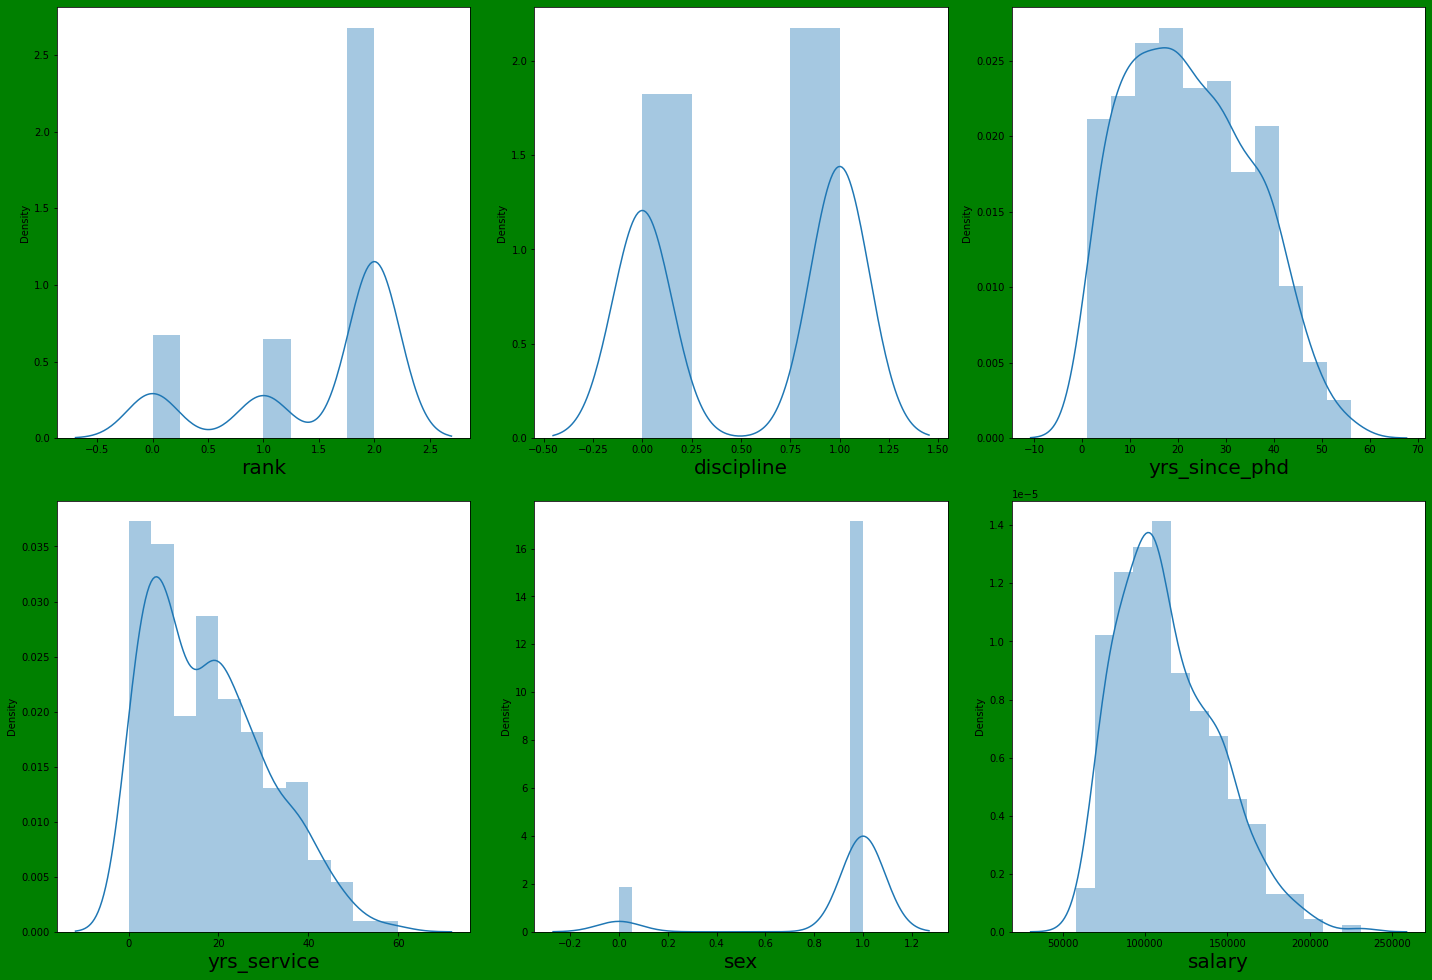

In [121]:
plt.figure(figsize = (20,20), facecolor = 'green')
plotnumber = 1

for column in data:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

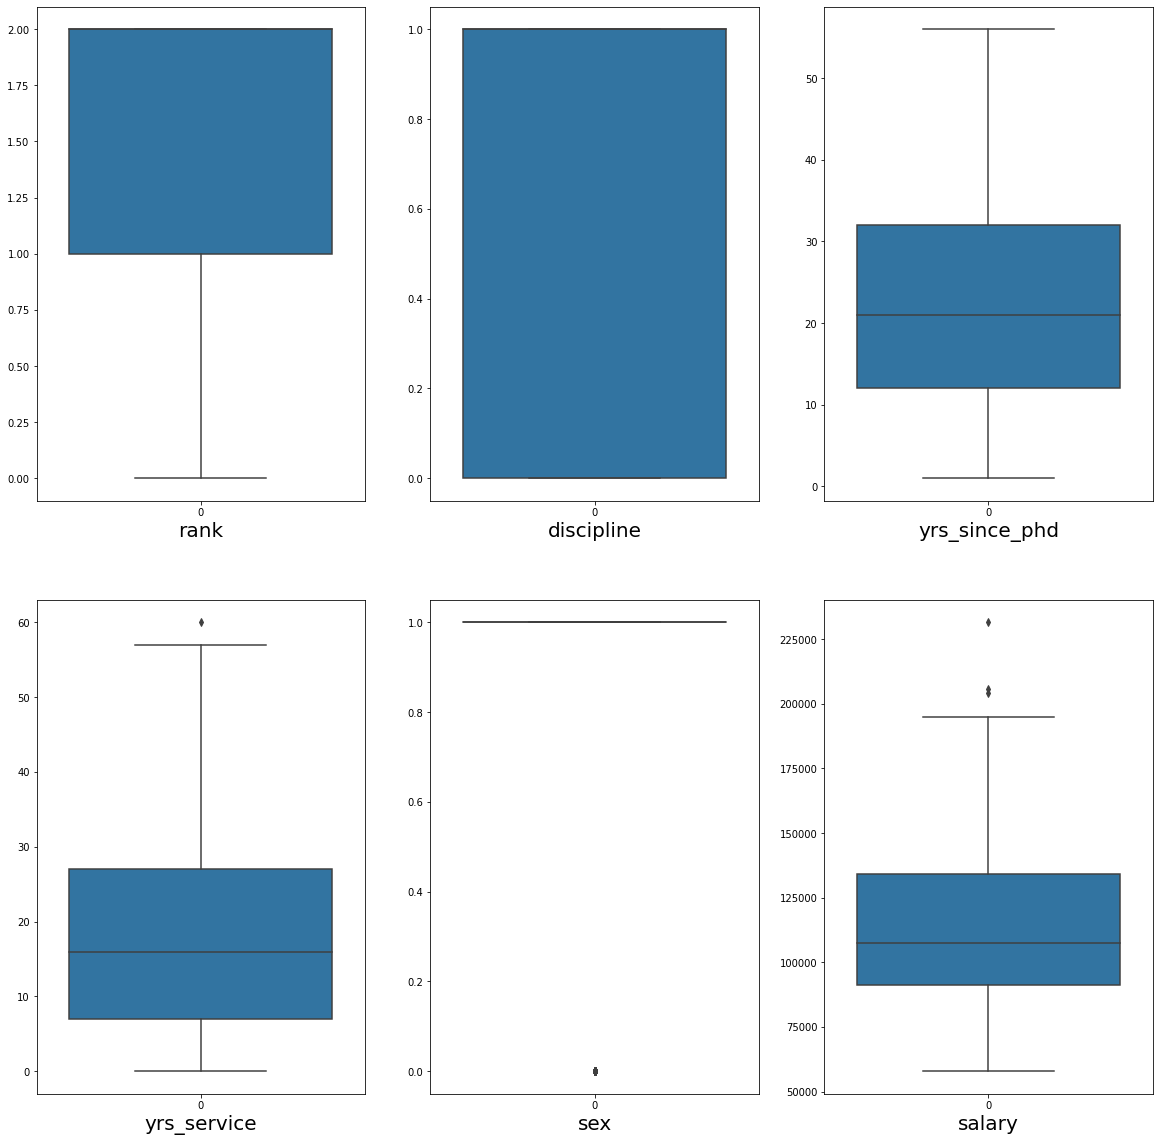

In [122]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(data = data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()

In [123]:
# There seems to be some outlier, in yrs.service columns

In [124]:
#1st Quantile
q1 = data.quantile(0.25)

#3rd quantile
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [125]:
# Validating OUtliers

yrs_service_high = q3.yrs_service + (1.5 * iqr.yrs_service)

# Check the Indexes which have higher values

index1 = np.where(data['yrs_service']> yrs_service_high)

In [126]:
data = data.drop(data.index[index1])

print(data.shape)

data.reset_index()

(396, 6)


,index,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,0,2.0,1,19,18,1,139750
1,1,2.0,1,20,16,1,173200
2,2,0.0,1,4,3,1,79750
3,3,2.0,1,45,39,1,115000
4,4,2.0,1,40,41,1,141500
...,...,...,...,...,...,...,...
391,392,2.0,0,33,30,1,103106
392,393,2.0,0,31,19,1,150564
393,394,2.0,0,42,25,1,101738
394,395,2.0,0,25,15,1,95329


In [127]:
data_corr = data.corr().abs()

data_corr

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
rank,1.000000,0.109042,0.701735,0.611594,0.138106,0.618574
discipline,0.109042,1.000000,0.224337,0.174688,0.002964,0.151536
yrs_since_phd,0.701735,0.224337,1.000000,0.909763,0.147885,0.411373
yrs_service,0.611594,0.174688,0.909763,1.000000,0.153113,0.320388
sex,0.138106,0.002964,0.147885,0.153113,1.000000,0.137641
salary,0.618574,0.151536,0.411373,0.320388,0.137641,1.000000


Seems like yrs_since_phd and yrs_service are correlated

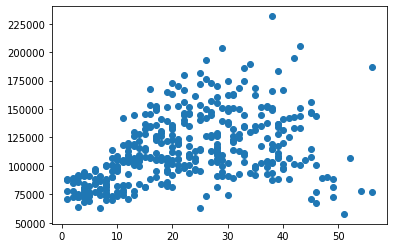

In [128]:
plt.scatter(data.yrs_since_phd, data.salary)
plt.show()

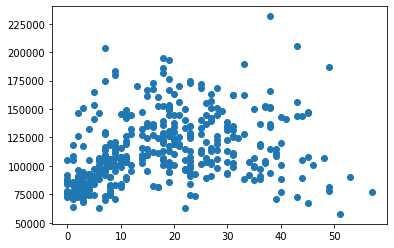

In [129]:
plt.scatter(data.yrs_service, data.salary)
plt.show()

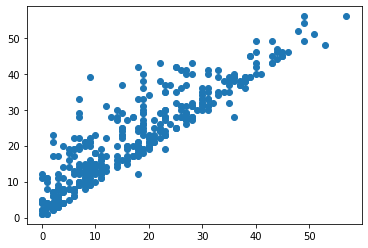

In [130]:
plt.scatter(data.yrs_service, data.yrs_since_phd)
plt.show()

there seems to be a linear relation between yrs_since_phd and yrs_service, but there are other points as well which does not follows the same relation.

therefore, I will not take risk to delete any of the column.

In [131]:
x = data.drop('salary', axis=1)
y = data['salary']

In [132]:
x

,rank,discipline,yrs_since_phd,yrs_service,sex
0,2.0,1,19,18,1
1,2.0,1,20,16,1
2,0.0,1,4,3,1
3,2.0,1,45,39,1
4,2.0,1,40,41,1
...,...,...,...,...,...
392,2.0,0,33,30,1
393,2.0,0,31,19,1
394,2.0,0,42,25,1
395,2.0,0,25,15,1


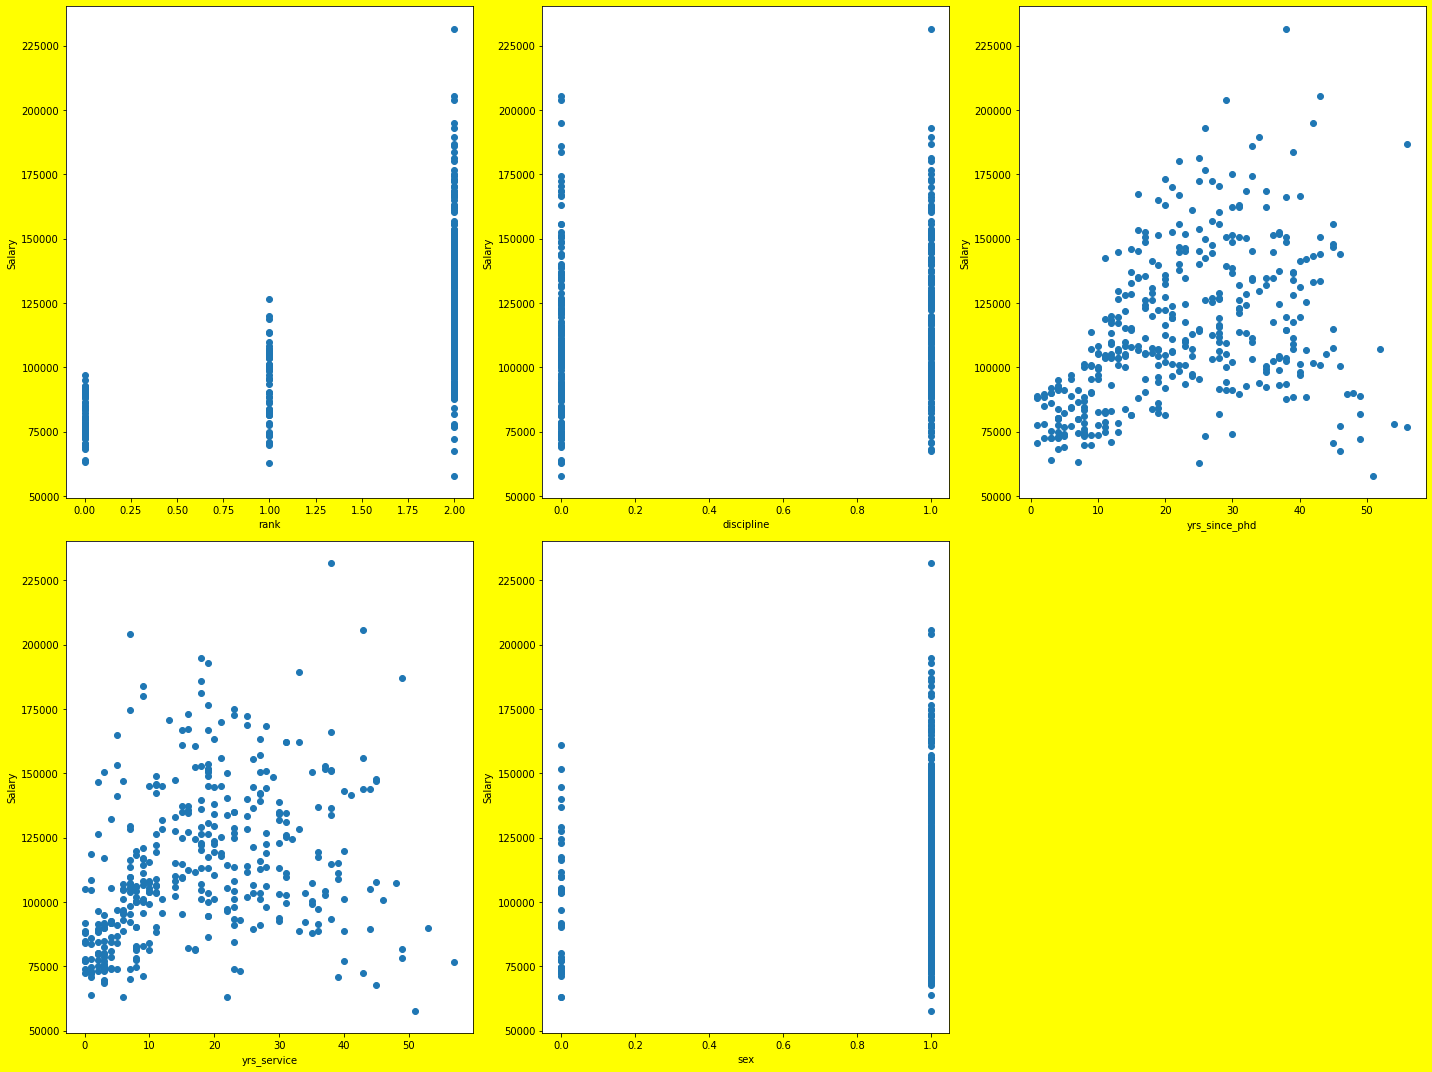

In [133]:
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Salary', fontsize = 10)
    plotnumber +=1
plt.tight_layout()

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
# Data Scaling

scaler = StandardScaler()
 
x_scaled = scaler.fit_transform(x)

BEST RANDOM STATE

In [136]:
max_r2_score = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    r2_score = LR.score(x_test,y_test)
    print('r2_score', r2_score*100,'%', 'random_state', i)
    
    if r2_score > max_r2_score:
        max_r2_score = r2_score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 45.13725805791115 % random_state 1
r2_score 45.13725805791115 % random_state 1
r2_score 41.005785169729826 % random_state 2
r2_score 45.43777871703178 % random_state 3
r2_score 45.43777871703178 % random_state 3
r2_score 39.218881608308706 % random_state 4
r2_score 37.80471390424197 % random_state 5
r2_score 32.49218570016216 % random_state 6
r2_score 51.5957881356566 % random_state 7
r2_score 51.5957881356566 % random_state 7
r2_score 27.251574474294127 % random_state 8
r2_score 39.37484930361327 % random_state 9
r2_score 43.52400960453565 % random_state 10
r2_score 31.552260136296628 % random_state 11
r2_score 30.599917502391516 % random_state 12
r2_score 36.29568641462857 % random_state 13
r2_score 23.016991233680006 % random_state 14
r2_score 47.69696923015999 % random_state 15
r2_score 48.06801227392992 % random_state 16
r2_score 46.86518200562881 % random_state 17
r2_score 40.25027943485704 % random_state 18
r2_score 53.79788538383659 % random_state 19
r2_score 53.797885

r2_score 43.62034676379402 % random_state 189
r2_score 54.00689388951342 % random_state 190
r2_score 42.964674946903195 % random_state 191
r2_score 46.943936793716446 % random_state 192
r2_score 47.026172601503234 % random_state 193
r2_score 43.13202304493963 % random_state 194
r2_score 35.82426899971502 % random_state 195
r2_score 34.0713473378767 % random_state 196
r2_score 49.88619848264179 % random_state 197
r2_score 40.40713239643772 % random_state 198
r2_score 44.0020098135914 % random_state 199


In [137]:
print('Best R2 Score is', max_r2_score, 'on Random_state', maxRS)

Best R2 Score is 0.5834287306395469 on Random_state 148


In [138]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 148)

In [139]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [140]:
LR.score(x_test, y_test)

0.5834287306395469

In [141]:
mean_squared_error(y_test, y_pred)

338641325.9287224

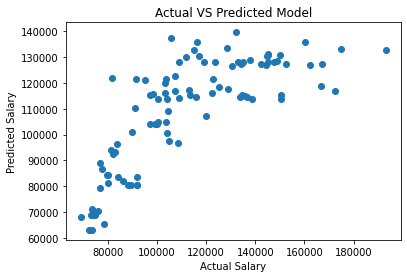

In [142]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual VS Predicted Model')
plt.show()

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

print("Square Root of Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  14049.081322009804
Mean Squared Error:  338641325.9287224
Square Root of Mean Square Error:  18402.20981101787


These are very big error values, therefore model needs to be regularize.

# Model Regualrization

In [144]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [145]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [146]:
alpha = lasscv.alpha_

alpha

1.0277959303817075

In [147]:
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.0277959303817075)

In [148]:
lasso_reg.score(x_test,y_test)

0.5834597679879743

# Using Ridge Model

In [149]:
ridgecv = RidgeCV(alphas = np.arange(0.001,2,0.01), normalize = True)

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       1.621e+00, 1.631e+00, 1.641e+00, 1.651e+00, 1.661e+00, 1.671e+00,
       1.681e+00, 1.691e+00, 1.701e+00, 1.711e+00, 1.721e+00, 1.731e+00,
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00]),
        normalize=True)

In [150]:
alpha = ridgecv.alpha_

alpha

0.020999999999999998

In [151]:
ridge_model = Ridge(alpha)

ridge_model.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [152]:
ridge_model.score(x_test,y_test)

0.5834469681437666